# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json



# Import API key
from api_keys import key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [ ]:
weather = pd.read_csv("Outputs/weather_data.csv")
weather


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [ ]:
gmaps.configure(api_key=key)

locations = weather[["Lat", "Lng"]].astype(float)

humidity = weather["Humidity"].astype(float)

In [ ]:
fig1 = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
fig1.add_layer(heat_layer)

fig1

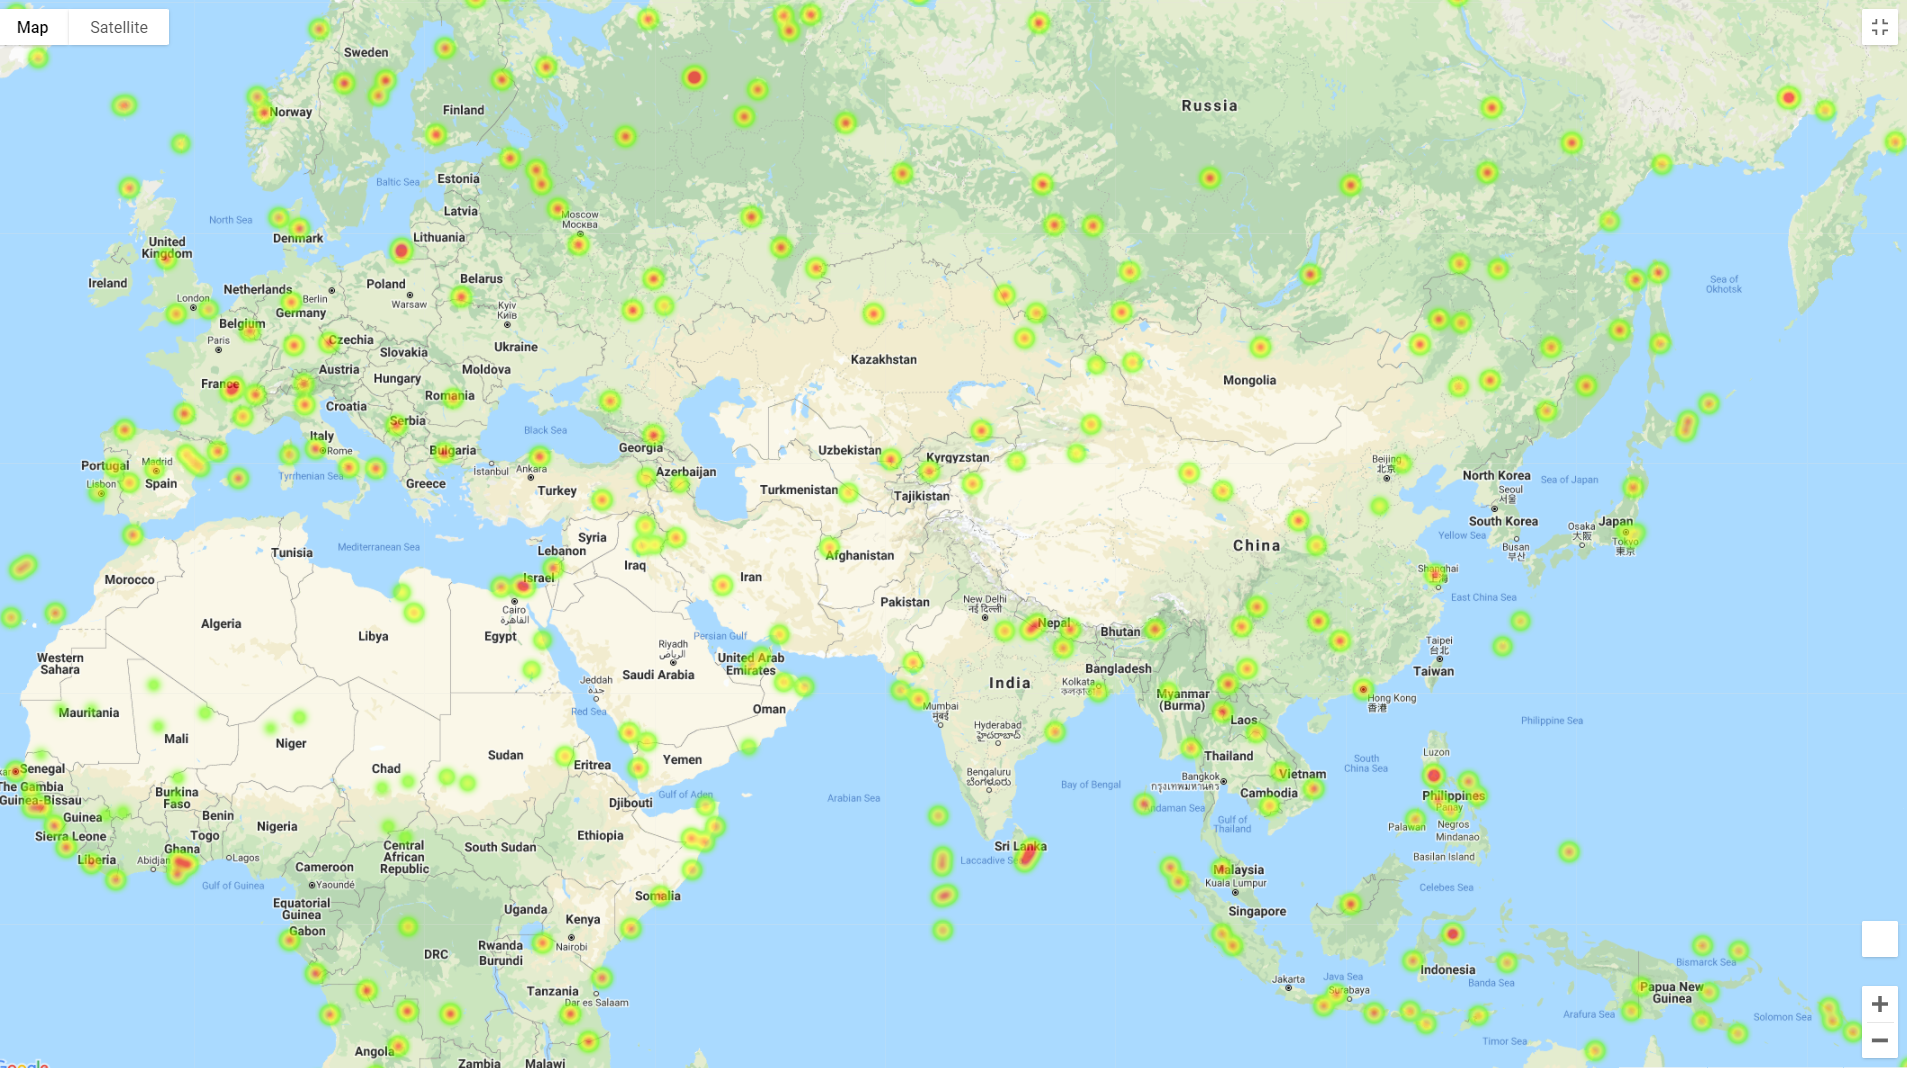

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [ ]:
weather = weather[weather["Max Temp"] < 80]
weather = weather[weather["Max Temp"] > 70]
weather = weather[weather["Cloudiness"] == 0]
weather

In [ ]:
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
params = {
    "location": "17.0151, 54. 0924",
    "rankby": "distance",
    "keyword": "hotel",
    "key": key,
}


response = requests.request("GET", base_url, params=params)


print(response)

### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [ ]:
hotelsdf = weather
hotelname = []
params = {
    "radius": 5000,
    "type": "lodging",
    "key": key,
}

#hotel_df = weather
#hotel_df["Hotel Name"]: ""
    
for index, row in hotels.iterrows():

    lat = row["Lat"]
    lng = row["Lng"]
    
    # add keyword to params dict
    params["location"] = f"{lat},{lng}"
        
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    #print(f"Grabbing the nearest hotel to {row['City']}.")
    response = requests.get(base_url, params=params)
    
    request = response.json()
    
    try:
        hotelname.append(request['results'][0]['name'])
    except KeyError:
        hotelname.append(None)
print(hotelname)

hotelsdf["Hotel Name"] = hotelname
hotelsdf = hotelsdf.dropna(how='any')
hotelsdf.to_csv("Outputs\cityhotelsdf.csv")
hotelsdf

In [ ]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotelsdf.iterrows()]
locations = hotelsdf[["Lat", "Lng"]]

In [ ]:
# Add marker layer ontop of heat map
#fig2 = gmaps.figure()

#heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 #dissipating=False, max_intensity=100,
                                 #point_radius = 1)
markers = gmaps.marker_layer(locations)

#fig2.add_layer(heat_layer)
fig1.add_layer(markers)
# Display figure
fig1

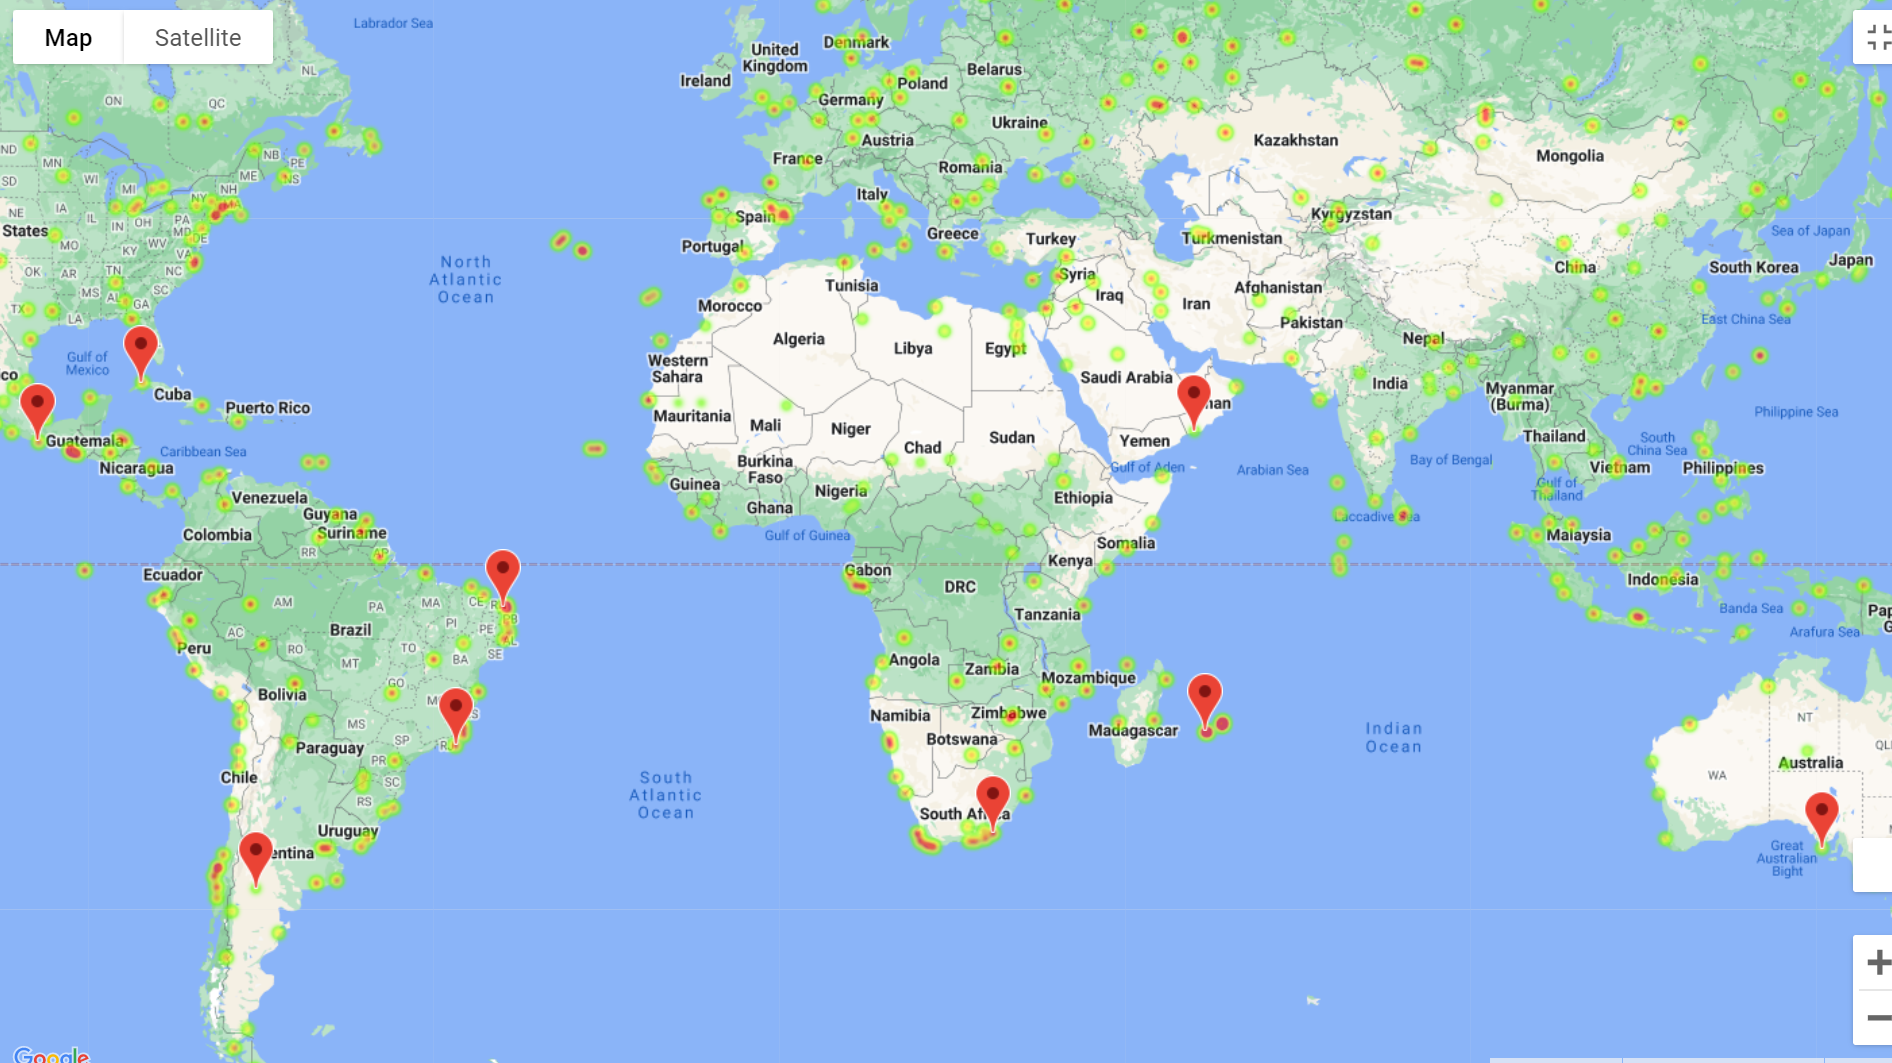
